In [ ]:
import urllib.request

def download_url(url, save_as):
    response = urllib.request.urlopen(url)
    data = response.read()
    file = open(save_as, 'wb')
    file.write(data)
    file.close()
    response.close()
    
def read_binary_file(file):
    f = open(file,'rb')
    block = f.read()
    return block.decode('utf-16')

def split_text_in_lines(text):
    return text.split('\r\n')

def split_by_tabs(line):
    return line.split('\t')

In [ ]:
names_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.names'
data_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.data'
diagnosis_names = 'diagnosis.names'
diagnosis_data = 'diagnosis.data'
download_url(names_link, diagnosis_names)
download_url(data_link, diagnosis_data)

In [ ]:
import numpy as np

def parse_double(field):
    field = field.replace(',', '.')
    return float(field)

def parse_boolean(field):
    return 1. if field == 'yes' else 0.

def read_np_array(file = diagnosis_data):
    text = read_binary_file(file)
    lines = split_text_in_lines(text)
    rows = []
    for line in lines:
        if line == '': continue
        line = line.replace('\r\n', '')
        fields = split_by_tabs(line)
        row = []
        j = 0
        for field in fields:
            value = parse_double(field) if j == 0 else parse_boolean(field)
            row.append(value)
            j += 1
        rows.append(row)
    matrix = np.array(rows, dtype = np.float32)
    return matrix

In [ ]:
def get_random_indexes(n):
    indexes = list(range(n))
    random_indexes = []
    for i in range(n):
        r = np.random.randint(len(indexes))
        random_indexes.append(indexes.pop(r))
    return random_indexes

def get_indexes_for_2_datasets(n, training = 80):
    indexes = get_random_indexes(n)
    train = int(training / 100. * n)
    return indexes[:train], indexes[train:]

matrix = read_np_array()
n_samples, n_dimensions = matrix.shape

train_indexes, test_indexes = get_indexes_for_2_datasets(n_samples)
train_data = matrix[train_indexes]
test_data = matrix[test_indexes]

def print_dataset(name, data):
    print('Dataset {}. Shape: {}'.format(name, data.shape))
    print(data)

In [6]:
print_dataset('Train', train_data)


Dataset Train. Shape: (96, 8)
[[37.   0.   0.   1.   0.   0.   1.   0. ]
 [41.   1.   1.   0.   1.   0.   0.   1. ]
 [37.9  0.   0.   1.   1.   1.   1.   0. ]
 [36.   0.   1.   0.   0.   0.   0.   0. ]
 [40.3  0.   1.   1.   0.   1.   0.   1. ]
 [40.7  0.   0.   0.   0.   0.   0.   0. ]
 [41.3  1.   1.   1.   1.   0.   1.   1. ]
 [36.8  0.   0.   1.   1.   1.   1.   0. ]
 [40.2  1.   1.   1.   1.   1.   1.   1. ]
 [37.7  0.   1.   0.   0.   0.   0.   0. ]
 [37.5  0.   0.   1.   1.   1.   1.   0. ]
 [37.1  0.   0.   1.   0.   0.   1.   0. ]
 [41.   0.   1.   1.   0.   1.   0.   1. ]
 [37.1  0.   0.   1.   1.   1.   1.   0. ]
 [40.7  1.   1.   0.   1.   0.   0.   1. ]
 [37.   0.   0.   1.   1.   1.   1.   0. ]
 [41.4  0.   1.   1.   0.   1.   0.   1. ]
 [37.8  0.   0.   1.   1.   1.   1.   0. ]
 [37.2  0.   0.   1.   0.   0.   1.   0. ]
 [36.6  0.   0.   1.   1.   1.   1.   0. ]
 [37.9  0.   0.   1.   1.   0.   1.   0. ]
 [35.9  0.   1.   0.   0.   0.   0.   0. ]
 [39.   0.   1.   1.   0

In [7]:
print_dataset('Test', test_data)


Dataset Test. Shape: (24, 8)
[[40.9  1.   1.   1.   1.   0.   1.   1. ]
 [37.6  0.   0.   1.   1.   1.   1.   0. ]
 [37.5  0.   1.   0.   0.   0.   0.   0. ]
 [40.   0.   1.   1.   0.   1.   0.   1. ]
 [40.6  1.   1.   1.   1.   1.   1.   1. ]
 [38.5  0.   1.   1.   0.   1.   0.   1. ]
 [37.9  0.   0.   1.   1.   0.   1.   0. ]
 [36.8  0.   0.   1.   1.   1.   1.   0. ]
 [37.5  0.   1.   0.   0.   0.   0.   0. ]
 [41.2  1.   1.   1.   1.   1.   1.   1. ]
 [41.5  0.   1.   1.   0.   1.   0.   1. ]
 [41.1  0.   0.   0.   0.   0.   0.   0. ]
 [37.6  0.   0.   1.   1.   0.   1.   0. ]
 [36.7  0.   1.   0.   0.   0.   0.   0. ]
 [41.   0.   0.   0.   0.   0.   0.   0. ]
 [40.8  0.   1.   1.   0.   1.   0.   1. ]
 [40.   1.   1.   1.   1.   1.   1.   1. ]
 [40.4  1.   1.   0.   1.   0.   0.   1. ]
 [38.1  0.   1.   1.   0.   1.   0.   1. ]
 [37.9  0.   1.   0.   0.   0.   0.   0. ]
 [39.4  0.   1.   1.   0.   1.   0.   1. ]
 [36.9  0.   0.   1.   1.   1.   1.   0. ]
 [37.2  0.   0.   1.   1.

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
input_size = 6
learning_rate = 0.01
num_iterations = 20000

class LogisticRegression(torch.nn.Module):

    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [ ]:
def decide(y):
    return 1. if y >= 0.5 else 0.

decide_vectorized = np.vectorize(decide)

to_percent = lambda x: '{:.2f}%'.format(x)
def compute_accuracy(model, input, output):
    prediction = model(input).data.numpy()[:, 0]
    n_samples = prediction.shape[0] + 0.
    prediction = decide_vectorized(prediction)
    equal = prediction == output.data.numpy()
    return 100. * equal.sum() / n_samples

def get_input_and_output(data):
    input = Variable(torch.tensor(data[:, :6], dtype = torch.float32))
    output1 = Variable(torch.tensor(data[:, 6], dtype = torch.float32))
    output2 = Variable(torch.tensor(data[:, 7], dtype = torch.float32))
    return input, output1, output2
    input, output1, output2 = get_input_and_output(train_data)
test_input, test_output1, test_output2 = get_input_and_output(test_data)
import matplotlib.pyplot as plt
%matplotlib inline

diagnosis_title1 = 'Inflammation of Urinary Bladder'
def plot_graphs(diagnosis_title, losses, accuracies):
    plt.plot(losses)
    plt.title(f"{diagnosis_title} - Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    plt.plot(accuracies)
    plt.title(f"{diagnosis_title} - Training Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy (Percent %)")
    plt.show()
    def train_model(diagnosis_title, input, output, test_input, test_output):
    model = LogisticRegression()
    criterion = torch.nn.BCELoss(size_average=True)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
    losses = []
    accuracies = []
    n_samples, _ = input.shape
    for iteration in range(num_iterations):
            optimizer.zero_grad()
            prediction = model(input)
            loss = criterion(prediction, output)
            loss.backward()
            optimizer.step()
            if iteration % 500 == 0:
                train_acc = compute_accuracy(model, input, output)
                train_loss = loss.item()
                losses.append(train_loss)
                accuracies.append(train_acc)
                print('iteration={}, loss={:.4f}, train_acc={}'.format(iteration, train_loss, to_percent(train_acc)))
    plot_graphs(diagnosis_title, losses, accuracies)
    test_acc = compute_accuracy(model, test_input, test_output)
    print('\nTesting Accuracy = {}'.format(to_percent(test_acc)))
    return model


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([96])) that is different to the input size (torch.Size([96, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


iteration=0, loss=1.5656, train_acc=48.96%
iteration=500, loss=1.3920, train_acc=48.96%
iteration=1000, loss=0.9035, train_acc=48.96%
iteration=1500, loss=0.3168, train_acc=89.58%
iteration=2000, loss=0.1812, train_acc=100.00%
iteration=2500, loss=0.1632, train_acc=100.00%
iteration=3000, loss=0.1488, train_acc=100.00%
iteration=3500, loss=0.1368, train_acc=100.00%
iteration=4000, loss=0.1267, train_acc=100.00%
iteration=4500, loss=0.1181, train_acc=100.00%
iteration=5000, loss=0.1105, train_acc=100.00%
iteration=5500, loss=0.1039, train_acc=100.00%
iteration=6000, loss=0.0981, train_acc=100.00%
iteration=6500, loss=0.0929, train_acc=100.00%
iteration=7000, loss=0.0882, train_acc=100.00%
iteration=7500, loss=0.0840, train_acc=100.00%
iteration=8000, loss=0.0802, train_acc=100.00%
iteration=8500, loss=0.0767, train_acc=100.00%
iteration=9000, loss=0.0735, train_acc=100.00%
iteration=9500, loss=0.0706, train_acc=100.00%
iteration=10000, loss=0.0678, train_acc=100.00%
iteration=10500, los

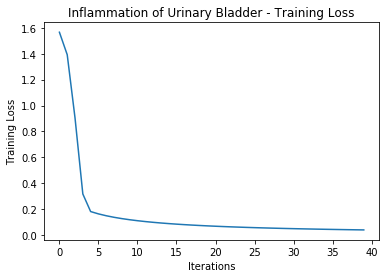

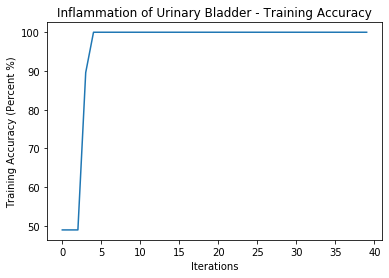


Testing Accuracy = 100.00%


In [19]:
model = train_model(diagnosis_title1, input, output1, test_input, test_output1)


In [ ]:
#Federated Learning

In [23]:
!pip install syft

     |████████████████████████████████| 337kB 8.7MB/s 
     |████████████████████████████████| 81kB 8.4MB/s 
     |████████████████████████████████| 460kB 51.6MB/s 
     |████████████████████████████████| 256kB 42.9MB/s 
     |████████████████████████████████| 204kB 51.9MB/s 
     |████████████████████████████████| 399kB 41.9MB/s 
     |████████████████████████████████| 51kB 2.2MB/s 
     |████████████████████████████████| 122kB 51.1MB/s 
  Created wheel for zstd: filename=zstd-1.4.3.2-cp36-cp36m-linux_x86_64.whl size=1076266 sha256=6b81e839ef7820498236492b91f04043767b520ece05d43b955d13a780fa7807
  Stored in directory: /root/.cache/pip/wheels/f2/df/a8/405bafcabba88a18c8763694e79177e2a1bbc65ac0f6b3d728
Successfully built zstd
  Found existing installation: msgpack 0.5.6
    Uninstalling msgpack-0.5.6:
      Successfully uninstalled msgpack-0.5.6


In [32]:
import syft as sy
import torch as th
hook = sy.TorchHook(th)
from torch import nn, optim
n_hospitals = 4
hospitals = []
for i in range(n_hospitals):
    hospital_name = 'hospital{}'.format(i)
    hospital = sy.VirtualWorker(hook, id = hospital_name)
    hospitals.append(hospital)
secure_worker = sy.VirtualWorker(hook, id="secure_worker")
def get_workers_names(workers):
    return [worker.id for worker in workers]

def add_and_print_workers(worker, workers):
    print('workers of {} = {}'.format(worker.id, get_workers_names(workers)))
    worker.add_workers(workers)

for i in range(n_hospitals):
    workers = [hospitals[i2] for i2 in range(n_hospitals) if i2 != i] + [secure_worker]
    add_and_print_workers(hospitals[i], workers)
add_and_print_workers(secure_worker, hospitals)

Worker hospital1 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital2 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital3 already exists. Replacing old worker which could cause                     unexpected behavior
Worker secure_worker already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital0 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital2 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital3 already exists. Replacing old worker which could cause                     unexpected behavior
Worker secure_worker already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital0 already exists. Replacing old worker which could cause                     unex

workers of hospital0 = ['hospital1', 'hospital2', 'hospital3', 'secure_worker']
workers of hospital1 = ['hospital0', 'hospital2', 'hospital3', 'secure_worker']
workers of hospital2 = ['hospital0', 'hospital1', 'hospital3', 'secure_worker']
workers of hospital3 = ['hospital0', 'hospital1', 'hospital2', 'secure_worker']
workers of secure_worker = ['hospital0', 'hospital1', 'hospital2', 'hospital3']


In [33]:
n_samples = train_data.shape[0]
samples_per_hospital = int((n_samples + 0.5) / n_hospitals)
hospital_features = []
hospital_targets1 = []
hospital_targets2 = []
train_data = th.tensor(train_data, dtype = torch.float32, requires_grad=True)
for i in range(n_hospitals):
    train_data2 = train_data[i * samples_per_hospital:(i + 1) * samples_per_hospital].clone().detach().requires_grad_(True)
    features = train_data2[:, :6].clone().detach().requires_grad_(True)
    targets1 = train_data2[:, 6][:, None].clone().detach() 
    targets2 = train_data2[:, 7][:, None].clone().detach() 
    hospital_features.append(features.send(hospitals[i]))
    hospital_targets1.append(targets1.send(hospitals[i]))
    hospital_targets2.append(targets2.send(hospitals[i]))

print(model)

LogisticRegression(
  (linear): Linear(in_features=6, out_features=1, bias=True)
)


In [ ]:
def plot_federated_graphs(diagnosis_title, losses, accuracies):
    for i in range(n_hospitals):
        plt.plot(losses[i], label=f'Hospital {i}')
    legend = plt.legend(loc='upper right', shadow=True)
    plt.title(f"{diagnosis_title} - Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    for i in range(n_hospitals):
        plt.plot(accuracies[i], label=f'Hospital {i}')
    legend = plt.legend(loc='lower right', shadow=True)
    plt.title(f"{diagnosis_title} - Training Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy (Percent %)")
    plt.show()
def compute_federated_accuracy(model, input, output):
    prediction = model(input)
    n_samples = prediction.shape[0]
    s = 0.
    for i in range(n_samples):
        p = 1. if prediction[i] >= 0.5 else 0.
        e = 1. if p == output[i] else 0.
        s += e
    return 100. * s / n_samples

iterations = 1000 #2000
worker_iterations = 5
def federated_learning(diagnosis_title, hospital_features, hospital_targets, test_input, test_output):
    model = LogisticRegression()
    criterion = torch.nn.BCELoss(size_average=True)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
    losses = [[] for i in range(n_hospitals)]
    accuracies = [[] for i in range(n_hospitals)]
    for iteration in range(iterations):
        models = [model.copy().send(hospitals[i]) for i in range(n_hospitals)]
        optimizers = [torch.optim.SGD(params = models[i].parameters(), lr = learning_rate) for i in range(n_hospitals)]
        for worker_iteration in range(worker_iterations):
            last_losses = []
            for i in range(n_hospitals):
                optimizers[i].zero_grad()
                prediction = models[i](hospital_features[i])
                loss = criterion(prediction, hospital_targets[i])
                loss.backward()
                optimizers[i].step()
                loss = loss.get().data.item()
                last_losses.append(loss)
        for i in range(n_hospitals):
            losses[i].append(last_losses[i])
            train_acc = compute_federated_accuracy(models[i], hospital_features[i], hospital_targets[i])
            accuracies[i].append(train_acc)
            models[i].move(secure_worker)
        with th.no_grad():
            avg_weight = sum([models[i].linear.weight.data for i in range(n_hospitals)]) / n_hospitals
            model.linear.weight.set_(avg_weight.get())
            avg_bias = sum([models[i].linear.bias.data for i in range(n_hospitals)]) / n_hospitals
            model.linear.bias.set_(avg_bias.get())
        if iteration % 100 == 0:
            losses_str = ['{:.4f}'.format(losses[i][-1]) for i in range(n_hospitals)]
            accuracies_str = [to_percent(accuracies[i][-1]) for i in range(n_hospitals)]
            print('Iteration={}, losses={}, accuracies={}'.format(iteration, losses_str, accuracies_str))
    plot_federated_graphs(diagnosis_title, losses, accuracies)
    test_acc = compute_accuracy(model, test_input, test_output)
    print('\nTesting Accuracy = {}'.format(to_percent(test_acc)))
    return model

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Iteration=0, losses=['1.9069', '1.9583', '1.8771', '1.0122'], accuracies=['45.83%', '41.67%', '45.83%', '62.50%']
Iteration=100, losses=['1.4347', '1.3302', '1.3479', '0.9102'], accuracies=['45.83%', '41.67%', '45.83%', '62.50%']
Iteration=200, losses=['0.9010', '0.8793', '0.7133', '0.7099'], accuracies=['45.83%', '62.50%', '62.50%', '62.50%']
Iteration=300, losses=['0.3528', '0.2908', '0.2139', '0.5220'], accuracies=['79.17%', '87.50%', '100.00%', '62.50%']
Iteration=400, losses=['0.1735', '0.1646', '0.1604', '0.2544'], accuracies=['100.00%', '100.00%', '100.00%', '70.83%']
Iteration=500, losses=['0.1566', '0.1490', '0.1449', '0.1930'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=600, losses=['0.1432', '0.1360', '0.1324', '0.1727'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=700, losses=['0.1320', '0.1252', '0.1220', '0.1573'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=800, losses=['0.1225', '0.1161', '0.1133', '0.14

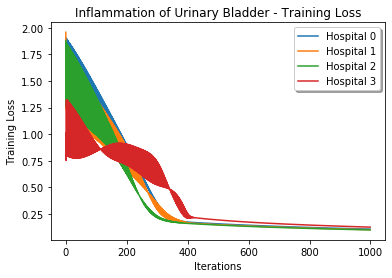

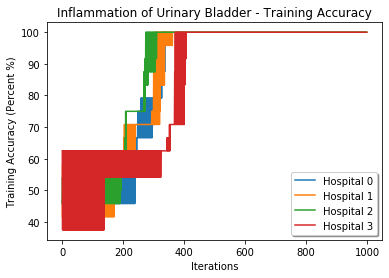


Testing Accuracy = 100.00%


In [37]:
model = federated_learning(diagnosis_title1, hospital_features, hospital_targets1, test_input, test_output1)
